In [76]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np

df = pd.read_csv('data.csv')

In [79]:
train,test = train_test_split(df, stratify=df['Claims'])
expr = 'Claims ~ Age + Sex + Geog + EV + VehAge + NCD'
mu = df['Claims'].mean()
var = df['Claims'].var()

In [78]:
print(f'mu={mu:.2}\nvar={var:.2}')

mu=0.011
var=0.012


- Var > Mu, which means the data is over-dispersed. Poisson will not be a great fit, as poisson assumes Var == Mu. I will test with both
    - Over-dispersion here is likely due to high 0 counts (zero-inflated).

To address Zero-Inflated data, Negitive Binomial Model may fit.

In [87]:
poisson = smf.glm(formula=expr, data=train,
                 family=sm.families.Binomial(link=sm.families.links.log())
                 ).fit()
negBinomial = smf.glm(formula=expr, data=train,
                     family=sm.families.NegativeBinomial(link=sm.families.links.log())
                     ).fit()

/Users/matt/miniforge3/envs/DS/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:298: DomainWarning: The log link function does not respect the domain of the Binomial family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [89]:
print(poisson.summary())
print(negBinomial.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Claims   No. Observations:                48411
Model:                            GLM   Df Residuals:                    48404
Model Family:                Binomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 14 Sep 2022   Deviance:                       6797.3
Time:                        21:20:56   Pearson chi2:                 5.51e+04
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8551      0.253    -11.286      0.0

/Users/matt/miniforge3/envs/DS/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:1767: RuntimeWarning: invalid value encountered in double_scalars
  prsq = 1 - np.exp((self.llnull - self.llf) * (2 / self.nobs))


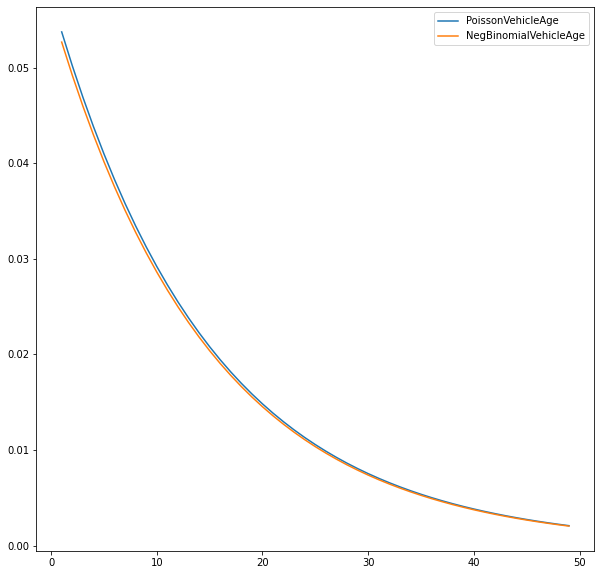

In [98]:
fig,axs=plt.subplots(1, figsize=(10,10))
steps = np.arange(1,50,1)
axs.plot(steps, [np.exp(poisson.params['Intercept'] + poisson.params['VehAge'] * i) for i in steps], label='PoissonVehicleAge')
axs.plot(steps, [np.exp(negBinomial.params['Intercept'] + negBinomial.params['VehAge'] * i) for i in steps], label='NegBinomialVehicleAge')
axs.legend()

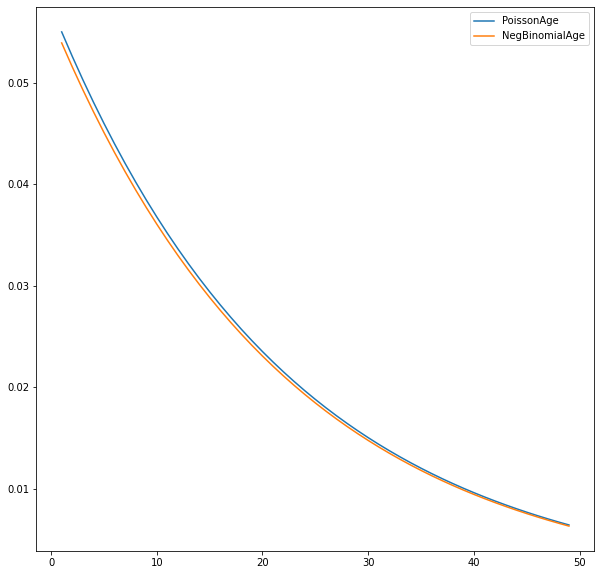

In [99]:
fig,axs=plt.subplots(1, figsize=(10,10))
steps = np.arange(1,50,1)
axs.plot(steps, [np.exp(poisson.params['Intercept'] + poisson.params['Age'] * i) for i in steps], label='PoissonAge')
axs.plot(steps, [np.exp(negBinomial.params['Intercept'] + negBinomial.params['Age'] * i) for i in steps], label='NegBinomialAge')
axs.legend()

In [46]:
[(poisson.params['Intercept'] + poisson.params['VehAge'] * i) for i in steps]

[-2.570637773285821,
 -2.6366425620635106,
 -2.7026473508411994,
 -2.7686521396188883,
 -2.8346569283965772,
 -2.9006617171742666,
 -2.9666665059519555,
 -3.032671294729645,
 -3.0986760835073337,
 -3.1646808722850226,
 -3.2306856610627115,
 -3.296690449840401,
 -3.3626952386180897,
 -3.428700027395779,
 -3.494704816173468,
 -3.560709604951157,
 -3.6267143937288457,
 -3.6927191825065346,
 -3.758723971284224,
 -3.824728760061913,
 -3.890733548839602,
 -3.956738337617291,
 -4.02274312639498,
 -4.088747915172669,
 -4.154752703950358,
 -4.220757492728048,
 -4.2867622815057365,
 -4.352767070283425,
 -4.418771859061114,
 -4.484776647838803,
 -4.550781436616493,
 -4.616786225394181,
 -4.682791014171871,
 -4.74879580294956,
 -4.8148005917272485,
 -4.880805380504937,
 -4.946810169282626,
 -5.012814958060316,
 -5.078819746838004,
 -5.144824535615694,
 -5.210829324393383,
 -5.276834113171072,
 -5.3428389019487605,
 -5.408843690726449,
 -5.474848479504139,
 -5.540853268281827,
 -5.606858057059517,
